In [1]:
#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [3]:
# Load the dataset

In [5]:
data = pd.read_csv('/content/Wine_clust  (1).csv')

In [6]:
# Show the first few rows of the dataset

In [7]:
print(data.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

In [8]:
#Data Preprocessing

In [9]:
# Standardize the data to have a mean of ~0 and a variance of 1

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [11]:
# Title: Finding the Optimum Number of Clusters using KMeans

In [12]:
# Use the Elbow Method to find the best number of clusters

In [14]:
wcss = []

In [15]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

In [16]:
# Plot the results to find the 'elbow'

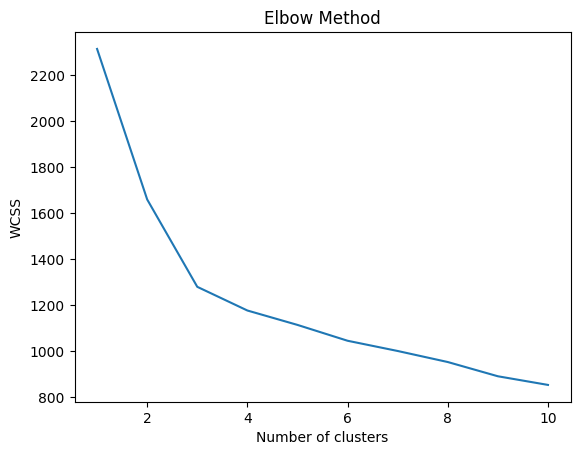

In [17]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
# Title: Creating KMeans Model with Optimum Number of Clusters

In [19]:
means = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_data)


KMeans(n_clusters=10, n_init=10, random_state=0)

In [20]:
# Predict the clusters

In [21]:
clusters = kmeans.predict(scaled_data)

In [22]:
# Add the cluster information to the original data

In [23]:
data['Cluster'] = clusters

In [24]:
print(data.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  
0   3.92     1065        1  
1   3.40     1050        1  
2   3

In [25]:
# DBSCAN Clustering


In [26]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_data)


DBSCAN()

In [27]:
data['DBSCAN_Cluster'] = dbscan.labels_

In [28]:
print(data.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Cluster  DBSCAN_Cluster  
0   3.92     1065        1              -1  
1 

In [29]:
#Plotting the Clusters

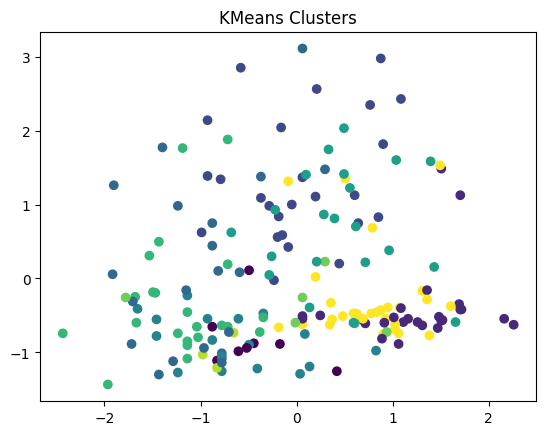

In [30]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
plt.title('KMeans Clusters')
plt.show()

In [31]:
# Plot the DBSCAN clusters

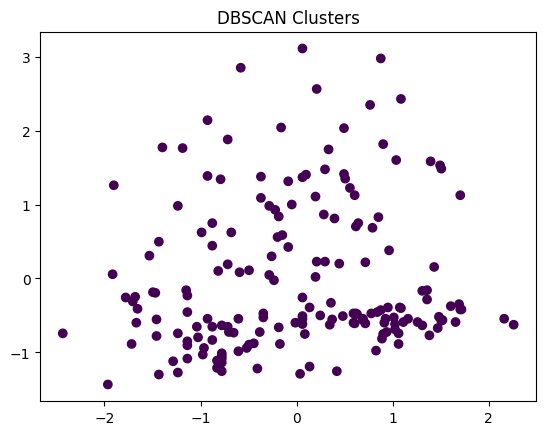

In [32]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title('DBSCAN Clusters')
plt.show()